Created by Chinara Siwi N.

# Kaggle Setup

In [ ]:
#Upload Kaggle API Key
from google.colab import files
files.upload()  #Upload kaggle.json

In [ ]:
#Install and Setup Kaggle API
!pip install kaggle

import shutil

# Ensure the .kaggle directory exists
!mkdir -p /root/.kaggle

# Move the uploaded kaggle.json to the .kaggle directory
shutil.move('kaggle (1).json', '/root/.kaggle/kaggle.json')

In [ ]:
#Verifying the file placement
!ls /root/.kaggle

In [ ]:
!kaggle datasets download -d mrmars1010/flipkart-product-datalaptops

In [ ]:
!unzip flipkart-product-datalaptops.zip

# Data Cleaning

In [6]:
import pandas as pd
df = pd.read_excel('Flipkart-Laptops.xlsx')
df.head()

,Product Name,ProductID,Product image,Actual price,Discount price,Stars,Rating,Reviews,Description,Link
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,NaN,89990,54990,3.9,7 Ratings,1 Reviews,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,https://www.flipkart.com/msi-cyborg-15-intel-c...
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,NaN,83990,67990,NIL,NIL,NIL,Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/msi-thin-15-intel-cor...
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,NaN,49240,35660,4.2,"1,805 Ratings",143 Reviews,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/dell-inspiron-3520-in...
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,NaN,43999,26990,4.2,"6,977 Ratings",596 Reviews,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,https://www.flipkart.com/acer-one-2024-intel-c...
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,NaN,59400,27989,4.2,"1,263 Ratings",113 Reviews,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,https://www.flipkart.com/lenovo-v15-amd-ryzen-...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    960 non-null    object 
 1   ProductID       960 non-null    object 
 2   Product image   0 non-null      float64
 3   Actual price    960 non-null    object 
 4   Discount price  960 non-null    object 
 5   Stars           960 non-null    object 
 6   Rating          960 non-null    object 
 7   Reviews         960 non-null    object 
 8   Description     960 non-null    object 
 9   Link            960 non-null    object 
dtypes: float64(1), object(9)
memory usage: 75.1+ KB


In [8]:
# Check missing values
df.isnull().sum()

,0
Product Name,0
ProductID,0
Product image,960
Actual price,0
Discount price,0
Stars,0
Rating,0
Reviews,0
Description,0
Link,0


In [9]:
# Drop unnecessary columns
df.drop(columns=['Product image','Link'],inplace=True)
df.head()

,Product Name,ProductID,Actual price,Discount price,Stars,Rating,Reviews,Description
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,89990,54990,3.9,7 Ratings,1 Reviews,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,83990,67990,NIL,NIL,NIL,Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,49240,35660,4.2,"1,805 Ratings",143 Reviews,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,43999,26990,4.2,"6,977 Ratings",596 Reviews,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,59400,27989,4.2,"1,263 Ratings",113 Reviews,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...


In [10]:
# ACTUAL PRICE
# Check unique values
df['Actual price'].unique()

# Replace the 'NIL' value with NaN
import numpy as np
df['Actual price'].replace('NIL',np.nan,inplace=True)

# Fill missing value with the average actual price
df['Actual price'].fillna(df['Actual price'].mean(),inplace=True)

# Convert data type
df['Actual price'] = df['Actual price'].astype(int)

<ipython-input-10-70e32a967c72>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Actual price'].replace('NIL',np.nan,inplace=True)
<ipython-input-10-70e32a967c72>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Actual price'].replace('NIL',np.nan,inplace=True)


In [11]:
# DISCOUNT PRICE
# Check unique values
df['Discount price'].unique()

# Replace the ' ' with NaN value
df['Discount price'].replace(' ',np.nan,inplace=True)

# Fill missing value with the average discount price
df['Discount price'].fillna(df['Discount price'].mean(),inplace=True)

# Convert data type
df['Discount price'] = df['Discount price'].astype(int)

<ipython-input-11-877c08a78b25>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount price'].replace(' ',np.nan,inplace=True)
<ipython-input-11-877c08a78b25>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount price'].replace(' ',np.nan,inplace=True)


In [12]:
# Show entries with NIL values in stars, ratings, and reviews
df[(df['Stars']=='NIL') | (df['Rating']=='NIL') | (df['Reviews']=='NIL')]

# Replace the 'NIL' values with 0
nil_cols = ['Stars','Rating','Reviews']
for col in nil_cols:
  df[col].replace('NIL',0,inplace=True)

# Delete the text Ratings and Reviews within the column
df['Rating'] = df['Rating'].str.replace('Ratings','')
df['Rating'] = df['Rating'].str.replace(',', '') # Remove commas
df['Reviews'] = df['Reviews'].str.replace('Reviews','')
df['Reviews'] = df['Reviews'].str.replace(',', '') # Remove commas

# Convert data type and fill missing values
df['Stars'] = df['Stars'].astype(float)
df['Rating'] = df['Rating'].fillna(0).astype(int)
df['Reviews'] = df['Reviews'].fillna(0).astype(int)

<ipython-input-12-3f719c876d34>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('NIL',0,inplace=True)
<ipython-input-12-3f719c876d34>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace('NIL',0,inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    960 non-null    object 
 1   ProductID       960 non-null    object 
 2   Actual price    960 non-null    int64  
 3   Discount price  960 non-null    int64  
 4   Stars           960 non-null    float64
 5   Rating          960 non-null    int64  
 6   Reviews         960 non-null    int64  
 7   Description     960 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 60.1+ KB


In [14]:
# Rename columns
df.rename(columns={
    'Product name':'Product Name',
    'Actual price':'Actual Price',
    'Discount price':'Discount Price',
    'Reviews':'Review'},inplace=True)

# Extract laptop brand
df['Laptop Brand'] = df['Product Name'].str.split(' ').str[0]
df.head()

,Product Name,ProductID,Actual Price,Discount Price,Stars,Rating,Review,Description,Laptop Brand
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,89990,54990,3.9,7,1,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,MSI
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,83990,67990,0.0,0,0,Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...,MSI
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,49240,35660,4.2,1805,143,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,DELL
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,43999,26990,4.2,6977,596,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Acer
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,59400,27989,4.2,1263,113,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,Lenovo


In [15]:
df['Laptop Brand'].unique()

array(['MSI', 'DELL', 'Acer', 'Lenovo', 'HP', 'ASUS', 'CHUWI', 'Thomson',
       'SAMSUNG', 'Ultimus', 'realme', 'ZEBRONICS', 'Infinix', 'Apple',
       'Colorful', 'Primebook', 'Avita', 'AXL', 'MICROSOFT', 'GIGABYTE',
       'Mi', 'Vaio'], dtype=object)

In [16]:
import re

# Extract processor type
def extract_processor(description):
    match = re.search(r'((Intel|AMD|MediaTek|Apple|Qualcomm|Pentium|Celeron)[\w\s]*)(Processor)', description)
    return match.group(1) if match else None

# Extract operating system
def extract_os(description):
    match = re.search(r'(Windows \d+|Mac OS|Linux|DOS|Chrome|Prime OS)', description)
    return match.group(0) if match else None

# Extract storage size
def extract_storage_size(description):
    match = re.search(r'(\d+) (GB|TB)', description)
    if match:
        size = int(match.group(1))
        if match.group(2) == 'TB':   # Convert TB to GB
            size *= 1024
        return int(size)
    else:
        return None

# Extract storage type
def extract_storage_type(description):
    match = re.search(r'(SSD|HDD)', description)
    return match.group() if match else None

# Extract display size (inch)
def extract_display_size(description):
    match = re.search(r'\((\d+(\.\d+)?)\s*inch\)', description, re.IGNORECASE)
    return float(match.group(1)) if match else None

In [17]:
# Apply the functions to create new features
df['Processor Type'] = df['Description'].apply(extract_processor)
df['Operating System'] = df['Description'].apply(extract_os)
df['Storage Size (GB)'] = df['Description'].apply(extract_storage_size)
df['Storage Type'] = df['Description'].apply(extract_storage_type)
df['Display Size (inch)'] = df['Description'].apply(extract_display_size)
df.head()

,Product Name,ProductID,Actual Price,Discount Price,Stars,Rating,Review,Description,Laptop Brand,Processor Type,Operating System,Storage Size (GB),Storage Type,Display Size (inch)
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,89990,54990,3.9,7,1,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,MSI,Intel Core i5,Windows 11,16,SSD,15.6
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,83990,67990,0.0,0,0,Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...,MSI,Intel Core i7,Windows 11,8,SSD,15.6
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,49240,35660,4.2,1805,143,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,DELL,Intel Core i3,Windows 11,8,SSD,15.6
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,43999,26990,4.2,6977,596,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Acer,Intel Core i3,Windows 11,8,SSD,14.0
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,59400,27989,4.2,1263,113,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,Lenovo,AMD Ryzen 3 Quad Core,Windows 11,8,SSD,NaN


In [18]:
df.isna().sum()

,0
Product Name,0
ProductID,0
Actual Price,0
Discount Price,0
Stars,0
Rating,0
Review,0
Description,0
Laptop Brand,0
Processor Type,0


In [19]:
# Handling missing values
df['Storage Type'] = df['Storage Type'].fillna('Not Specified')
df['Display Size (inch)'] = df['Display Size (inch)'].fillna('Not Specified')
df.isna().sum()

,0
Product Name,0
ProductID,0
Actual Price,0
Discount Price,0
Stars,0
Rating,0
Review,0
Description,0
Laptop Brand,0
Processor Type,0


In [20]:
# Check for duplicated data
df.duplicated().sum()

363

In [21]:
# Handling duplicated data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

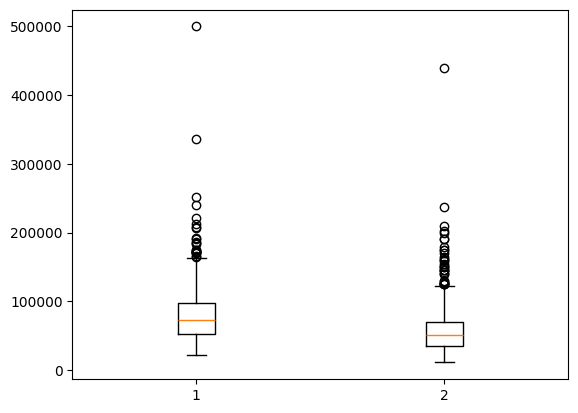

In [22]:
# Check for outliers using box plot
import matplotlib.pyplot as plt
plt.boxplot(df[['Actual Price','Discount Price']])
plt.show()

In [23]:
# Check for outliers using IQR method
Q1 = df[['Actual Price', 'Discount Price']].quantile(0.25)
Q3 = df[['Actual Price', 'Discount Price']].quantile(0.75)
IQR = Q3 - Q1

actual_price_outliers = (df['Actual Price'] < (Q1['Actual Price'] - 1.5 * IQR['Actual Price'])) | (df['Actual Price'] > (Q3['Actual Price'] + 1.5 * IQR['Actual Price']))
discount_price_outliers = (df['Discount Price'] < (Q1['Discount Price'] - 1.5 * IQR['Discount Price'])) | (df['Discount Price'] > (Q3['Discount Price'] + 1.5 * IQR['Discount Price']))

outliers = df[actual_price_outliers | discount_price_outliers]
outliers

,Product Name,ProductID,Actual Price,Discount Price,Stars,Rating,Review,Description,Laptop Brand,Processor Type,Operating System,Storage Size (GB),Storage Type,Display Size (inch)
10,ASUS TUF Gaming A15 (2024) AMD Ryzen 7 Octa Co...,COMGZW3FGTJMSNNM,143990,124990,0.0,0,0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,ASUS,AMD Ryzen 7 Octa Core,Windows 11,16,SSD,15.6
11,ASUS TUF Gaming A15 (2024) AMD Ryzen 9 Octa Co...,COMGZW3F57BZCGQC,171990,142990,0.0,0,0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,ASUS,AMD Ryzen 9 Octa Core,Windows 11,16,SSD,15.6
16,MSI Sword 16 HX Intel Core i7 14th Gen 14700HX...,COMGYSGNZVWFAHGH,139990,124990,0.0,0,0,Intel Core i7 Processor (14th Gen)16 GB DDR5 R...,MSI,Intel Core i7,Windows 11,16,SSD,16.0
17,MSI Prestige 16 AI Studio Intel Core Ultra 9 1...,COMGXMTAHXSHTQGD,212990,189990,0.0,0,0,Intel Core Ultra 9 Processor32 GB LPDDR5 RAMWi...,MSI,Intel Core Ultra 9,Windows 11,32,SSD,16.0
215,Apple MacBook Air Apple M3 - (16 GB/512 GB SSD...,COMGYP5GSZFWRXCE,174900,164490,4.6,220,15,Apple M3 Processor16 GB Unified Memory RAMMac ...,Apple,Apple M3,Mac OS,16,SSD,15.0
295,Acer Predator Helios 16 Intel Core i9 13th Gen...,COMGR5QEV93F62VC,171999,129990,4.3,65,8,Intel Core i9 Processor (13th Gen)16 GB DDR5 R...,Acer,Intel Core i9,Windows 11,16,SSD,16.0
302,Apple MacBook Air Apple M3 - (8 GB/256 GB SSD/...,COMGYP5GESFG6DZG,134900,126890,4.6,220,15,Apple M3 Processor8 GB Unified Memory RAMMac O...,Apple,Apple M3,Mac OS,8,SSD,15.0
357,ASUS ROG Zephyrus G14 OLED (2024) AMD Ryzen 9 ...,COMHFAHDZWK5BFHE,191990,174990,0.0,0,0,AMD Ryzen 9 Octa Core Processor16 GB LPDDR5X R...,ASUS,AMD Ryzen 9 Octa Core,Windows 11,16,SSD,14.0
433,Apple 2023 MacBook Pro Apple M3 - (8 GB/512 GB...,COMGUTX8W2XZUVZ8,169900,158390,4.1,7,2,Apple M3 Processor8 GB Unified Memory RAMMac O...,Apple,Apple M3,Mac OS,8,SSD,14.0
439,ASUS Zenbook 14 OLED (2024) Intel Core Ultra 9...,COMHYG8ZYMKBQXW9,170990,144990,0.0,0,0,Intel Core Ultra 9 Processor32 GB LPDDR5X RAMW...,ASUS,Intel Core Ultra 9,Windows 11,32,SSD,14.0


Laptops with high actual prices generally feature advanced, up-to-date specifications. For instance, the highest-priced laptop, MSI Titan 18 HX, justifies its cost with an Intel Core i9 processor, 16GB of RAM, and an 18-inch display. **These outliers** are thus valid and **will be retained** to capture the full price range in the analysis.

In [24]:
# Cleaned dataset ready for analysis
df_cleaned = df.drop(columns=['Description'])
df_cleaned.head()

,Product Name,ProductID,Actual Price,Discount Price,Stars,Rating,Review,Laptop Brand,Processor Type,Operating System,Storage Size (GB),Storage Type,Display Size (inch)
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,89990,54990,3.9,7,1,MSI,Intel Core i5,Windows 11,16,SSD,15.6
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,83990,67990,0.0,0,0,MSI,Intel Core i7,Windows 11,8,SSD,15.6
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,49240,35660,4.2,1805,143,DELL,Intel Core i3,Windows 11,8,SSD,15.6
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,43999,26990,4.2,6977,596,Acer,Intel Core i3,Windows 11,8,SSD,14.0
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,59400,27989,4.2,1263,113,Lenovo,AMD Ryzen 3 Quad Core,Windows 11,8,SSD,Not Specified


# Exploratory Data Analysis (EDA)

In [25]:
df_cleaned[['Actual Price','Discount Price', 'Stars', 'Rating', 'Review', 'Storage Size (GB)']].describe()

,Actual Price,Discount Price,Stars,Rating,Review,Storage Size (GB)
count,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000
mean,80775.169179,59037.98995,3.547404,722.137353,71.082077,11.899497
std,41801.894152,36829.20984,1.512092,1489.996234,144.209643,5.401027
min,21990.000000,10990.00000,0.000000,0.000000,0.000000,4.000000
25%,52999.000000,35000.00000,3.800000,9.000000,1.000000,8.000000
50%,72990.000000,50990.00000,4.200000,107.000000,11.000000,8.000000
75%,96999.000000,69990.00000,4.300000,608.000000,67.000000,16.000000
max,499990.000000,439990.00000,5.000000,12482.000000,1042.000000,64.000000


*   Prices range from 21990 INR to 499990 INR, showing a **varied price range**, possibly due to differences in specifications and brands.
*   **Discounts** are available **for all price** ranges.
*   The average rating is 3.55 stars, indicating that **most laptops have mid-to-high stars ratings**. Note that 0 star rating is because no one has rated it yet.
*   The maximum rating of 12482 shows that some laptops are **much more popular** or **widely used**. The same goes for the number of reviews with a maximum of 1042 reviews.
*   Laptops have a storage size of at least 4 GB and at most 64 GB. A storage size of 4 GB is typically sufficient for basic tasks, while 64 GB is suited for specialized, high-performance tasks. This range allows consumers to **select laptops based on** their **needs**.

<ipython-input-26-ed4f4fd2695b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands.index, x=top_brands.values, palette=sns.color_palette("Blues_r", len(top_brands)))


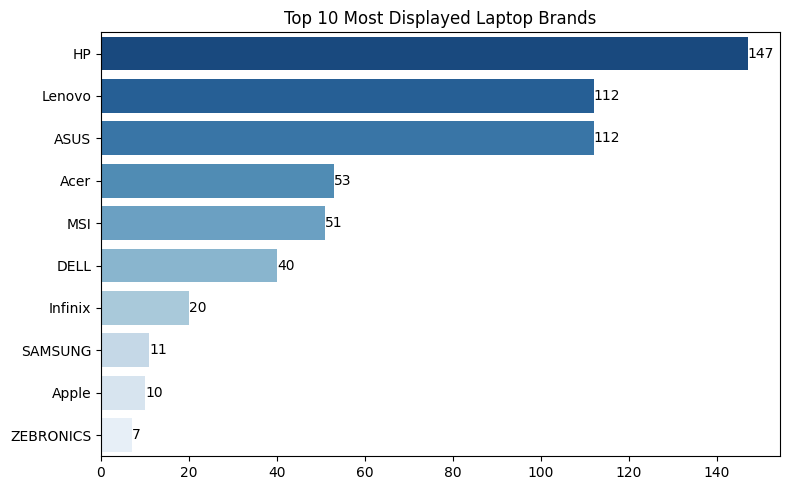

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Laptop Brands that are Most Displayed on the Flipkart Website
plt.figure(figsize=(8, 5))
top_brands = df_cleaned['Laptop Brand'].value_counts().nlargest(10)
sns.barplot(y=top_brands.index, x=top_brands.values, palette=sns.color_palette("Blues_r", len(top_brands)))

for index, value in enumerate(top_brands.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10, color="black")

plt.title('Top 10 Most Displayed Laptop Brands')
plt.ylabel('')
plt.tight_layout()
plt.show()

<ipython-input-27-73e7b017327a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_rated.index, x=most_rated.values, palette=sns.color_palette("Blues_r", len(most_rated)))


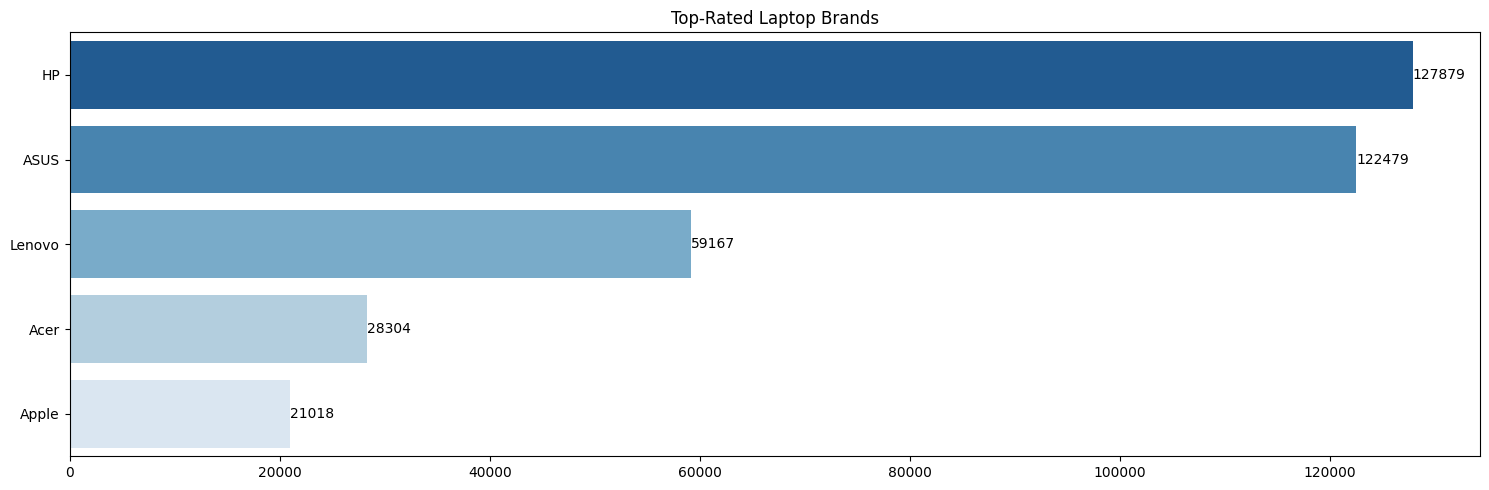

In [27]:
# Laptop Brands with Highest Number of Rating
plt.figure(figsize=(15, 5))
most_rated = df_cleaned.groupby('Laptop Brand')['Rating'].sum().sort_values(ascending=False).head()
sns.barplot(y=most_rated.index, x=most_rated.values, palette=sns.color_palette("Blues_r", len(most_rated)))

for index, value in enumerate(most_rated.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10, color="black")

plt.title('Top-Rated Laptop Brands')
plt.ylabel('')
plt.tight_layout()
plt.show()

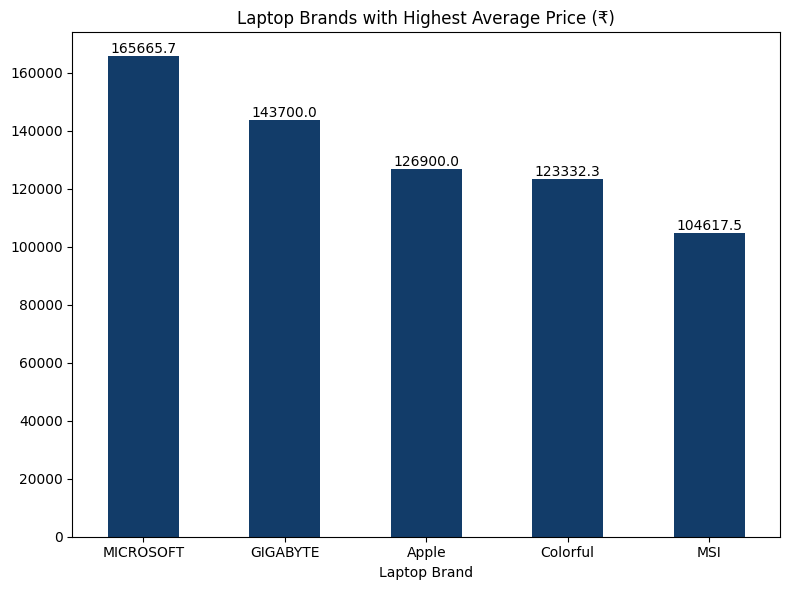

In [28]:
# 5 Laptop Brands with Highest Average Price
highest_avg = round(df_cleaned.groupby('Laptop Brand')['Actual Price'].mean(),1).sort_values(ascending=False).head()

plt.figure(figsize=(8, 6))
bars = highest_avg.plot(kind='bar', color='#123C69')

for index, value in enumerate(highest_avg):
    plt.text(index, value + 50, f"{value}", ha='center', va='bottom', fontsize=10)  # Positioning above the bar

plt.title('Laptop Brands with Highest Average Price (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

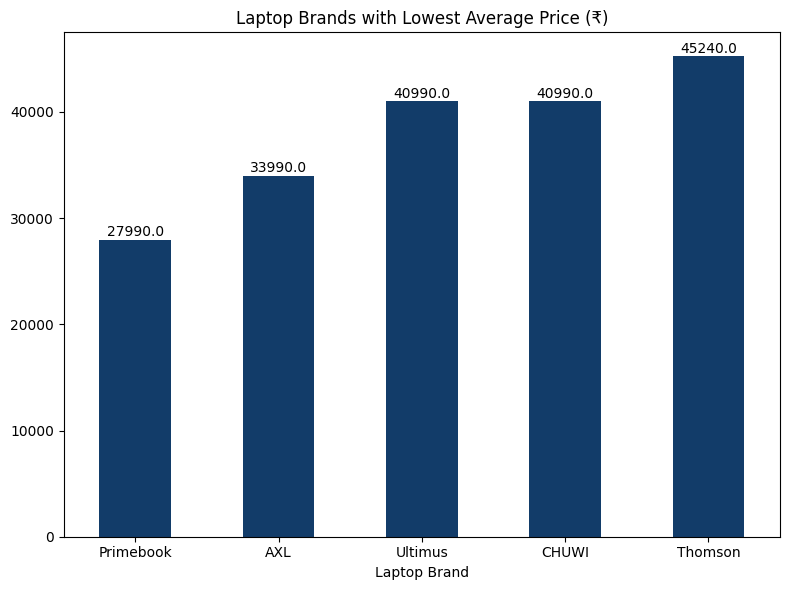

In [29]:
# 5 Laptop Brands with Lowest Average Price
lowest_avg = round(df_cleaned.groupby('Laptop Brand')['Actual Price'].mean(),1).sort_values(ascending=True).head()

plt.figure(figsize=(8, 6))
bars = lowest_avg.plot(kind='bar', color='#123C69')

for index, value in enumerate(lowest_avg):
    plt.text(index, value + 50, f"{value}", ha='center', va='bottom', fontsize=10)  # Positioning above the bar

plt.title('Laptop Brands with Lowest Average Price (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# Calculate the %discount
df_cleaned['Discount %'] = round(((df_cleaned['Actual Price']-df_cleaned['Discount Price']) / df_cleaned['Actual Price']) * 100, 1)
df_cleaned.head()

,Product Name,ProductID,Actual Price,Discount Price,Stars,Rating,Review,Laptop Brand,Processor Type,Operating System,Storage Size (GB),Storage Type,Display Size (inch),Discount %
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,89990,54990,3.9,7,1,MSI,Intel Core i5,Windows 11,16,SSD,15.6,38.9
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,83990,67990,0.0,0,0,MSI,Intel Core i7,Windows 11,8,SSD,15.6,19.0
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,49240,35660,4.2,1805,143,DELL,Intel Core i3,Windows 11,8,SSD,15.6,27.6
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,43999,26990,4.2,6977,596,Acer,Intel Core i3,Windows 11,8,SSD,14.0,38.7
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,59400,27989,4.2,1263,113,Lenovo,AMD Ryzen 3 Quad Core,Windows 11,8,SSD,Not Specified,52.9


In [31]:
# Laptop with the biggest discount of 68.2%
df_cleaned[df_cleaned['Discount %']==df_cleaned['Discount %'].max()]

,Product Name,ProductID,Actual Price,Discount Price,Stars,Rating,Review,Laptop Brand,Processor Type,Operating System,Storage Size (GB),Storage Type,Display Size (inch),Discount %
25,HP Chromebook (2024) MediaTek MT8183 - (4 GB/3...,COMGZFFXXHNVC5A5,34554,10990,3.8,5166,473,HP,MediaTek MT8183,Chrome,4,Not Specified,11.6,68.2


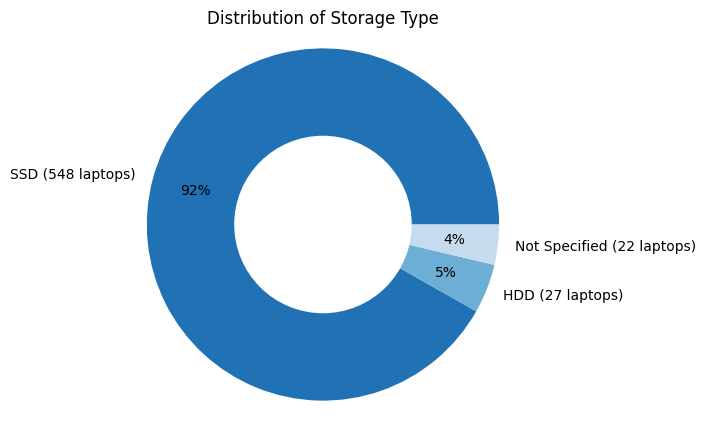

In [32]:
# Distribution of Storage Type
storage_type_counts = df_cleaned['Storage Type'].value_counts()
labels = [f"{storage_type} ({count} laptops)" for storage_type, count in zip(storage_type_counts.index, storage_type_counts)]

plt.figure(figsize=(5,5))
plt.pie(storage_type_counts, labels=labels, autopct='%1.0f%%',
        colors=sns.color_palette("Blues_r", len(storage_type_counts)),
        pctdistance=0.75)

center = plt.Circle((0, 0), 0.50, color='white')
fig = plt.gcf()
fig.gca().add_artist(center)

plt.axis('equal')  # Ensures the donut is a circle
plt.title('Distribution of Storage Type')
plt.show()

**SSD dominates** the storage type market due to its fast system response, durability, energy efficiency, etc.

<ipython-input-33-81dc0d81beb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Storage Size (GB)', y='Actual Price', data=df_cleaned, palette='Blues')


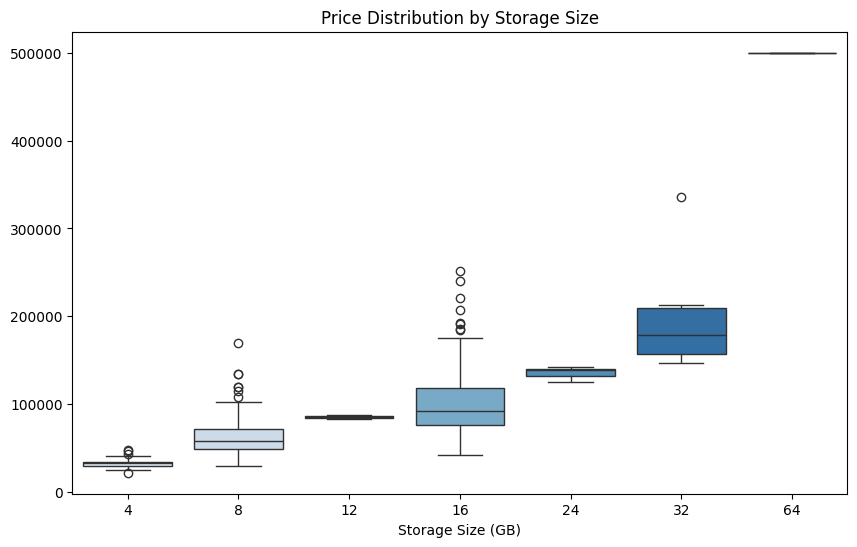

In [33]:
# Price Distribution by Storage Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage Size (GB)', y='Actual Price', data=df_cleaned, palette='Blues')
plt.title('Price Distribution by Storage Size')
plt.xlabel('Storage Size (GB)')
plt.ylabel('')
plt.show()

As storage size increases, the price range tends to increase as well (positive correlation). This is expected, as **larger storage sizes** typically come with higher-end specifications and thus, **higher price**.

Outliers in some storage size categories might represent **specialized laptops** with a high-end processor, additional features, or popular brand.

# Data Modelling

In [34]:
# Data Labeling
# Drop product name and productid
df_model = df_cleaned
df_model.drop(columns=['Product Name','ProductID'],inplace=True)

In [35]:
df_model['Display Size (inch)'] = df_model['Display Size (inch)'].replace("Not Specified", None)
df_model['Display Size (inch)'].fillna(df_model['Display Size (inch)'].median(), inplace=True)
df_model

<ipython-input-35-e260e75d69b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Display Size (inch)'].fillna(df_model['Display Size (inch)'].median(), inplace=True)
<ipython-input-35-e260e75d69b9>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['Display Size (inch)'].fillna(df_model['Displa

,Actual Price,Discount Price,Stars,Rating,Review,Laptop Brand,Processor Type,Operating System,Storage Size (GB),Storage Type,Display Size (inch),Discount %
0,89990,54990,3.9,7,1,MSI,Intel Core i5,Windows 11,16,SSD,15.6,38.9
1,83990,67990,0.0,0,0,MSI,Intel Core i7,Windows 11,8,SSD,15.6,19.0
2,49240,35660,4.2,1805,143,DELL,Intel Core i3,Windows 11,8,SSD,15.6,27.6
3,43999,26990,4.2,6977,596,Acer,Intel Core i3,Windows 11,8,SSD,14.0,38.7
4,59400,27989,4.2,1263,113,Lenovo,AMD Ryzen 3 Quad Core,Windows 11,8,SSD,15.6,52.9
...,...,...,...,...,...,...,...,...,...,...,...,...
951,73544,59960,4.3,148,19,HP,AMD Ryzen 5 Hexa Core,Windows 11,8,SSD,15.6,18.5
954,149999,77500,4.4,508,77,Acer,Intel Core i7,Windows 11,16,HDD,15.6,48.3
955,129999,79990,4.1,108,16,Acer,Intel Core Ultra 5,Windows 11,16,SSD,14.0,38.5
956,76746,82414,0.0,0,0,HP,Intel Core i5,Windows 11,16,SSD,15.6,-7.4


In [36]:
# Data Labeling (one hot encoding for nominal data)
df_model = pd.get_dummies(df_model, columns=['Laptop Brand', 'Processor Type', 'Operating System', 'Storage Type'], drop_first=True).astype(int)
df_model

,Actual Price,Discount Price,Stars,Rating,Review,Storage Size (GB),Display Size (inch),Discount %,Laptop Brand_AXL,Laptop Brand_Acer,...,Processor Type_Qualcomm Snapdragon X Elite,Processor Type_Qualcomm Snapdragon X Plus,Operating System_DOS,Operating System_Linux,Operating System_Mac OS,Operating System_Prime OS,Operating System_Windows 10,Operating System_Windows 11,Storage Type_Not Specified,Storage Type_SSD
0,89990,54990,3,7,1,16,15,38,0,0,...,0,0,0,0,0,0,0,1,0,1
1,83990,67990,0,0,0,8,15,19,0,0,...,0,0,0,0,0,0,0,1,0,1
2,49240,35660,4,1805,143,8,15,27,0,0,...,0,0,0,0,0,0,0,1,0,1
3,43999,26990,4,6977,596,8,14,38,0,1,...,0,0,0,0,0,0,0,1,0,1
4,59400,27989,4,1263,113,8,15,52,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,73544,59960,4,148,19,8,15,18,0,0,...,0,0,0,0,0,0,0,1,0,1
954,149999,77500,4,508,77,16,15,48,0,1,...,0,0,0,0,0,0,0,1,0,0
955,129999,79990,4,108,16,16,14,38,0,1,...,0,0,0,0,0,0,0,1,0,1
956,76746,82414,0,0,0,16,15,-7,0,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
# Drop the discount price as it doesn't really provide unique informations
# Drop the discount% as it was a derived ccalculation from the actual and discount price
df_model.drop(columns=['Discount Price','Discount %'],inplace=True)
df_model

,Actual Price,Stars,Rating,Review,Storage Size (GB),Display Size (inch),Laptop Brand_AXL,Laptop Brand_Acer,Laptop Brand_Apple,Laptop Brand_Avita,...,Processor Type_Qualcomm Snapdragon X Elite,Processor Type_Qualcomm Snapdragon X Plus,Operating System_DOS,Operating System_Linux,Operating System_Mac OS,Operating System_Prime OS,Operating System_Windows 10,Operating System_Windows 11,Storage Type_Not Specified,Storage Type_SSD
0,89990,3,7,1,16,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,83990,0,0,0,8,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,49240,4,1805,143,8,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,43999,4,6977,596,8,14,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,59400,4,1263,113,8,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,73544,4,148,19,8,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
954,149999,4,508,77,16,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
955,129999,4,108,16,16,14,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
956,76746,0,0,0,16,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [50]:
# Drop the stars, rating, review from the df
df_model.drop(columns=['Stars','Rating','Review'],inplace=True)
df_model

,Actual Price,Storage Size (GB),Display Size (inch),Laptop Brand_AXL,Laptop Brand_Acer,Laptop Brand_Apple,Laptop Brand_Avita,Laptop Brand_CHUWI,Laptop Brand_Colorful,Laptop Brand_DELL,...,Processor Type_Qualcomm Snapdragon X Elite,Processor Type_Qualcomm Snapdragon X Plus,Operating System_DOS,Operating System_Linux,Operating System_Mac OS,Operating System_Prime OS,Operating System_Windows 10,Operating System_Windows 11,Storage Type_Not Specified,Storage Type_SSD
0,89990,16,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,83990,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,49240,8,15,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,43999,8,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,59400,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,73544,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
954,149999,16,15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
955,129999,16,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
956,76746,16,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [53]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset
X = df_model.drop('Actual Price', axis=1)
y = df_model['Actual Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 427365178.67
Mean Absolute Error: 13073.13
R-squared: 0.70


In [59]:
# Features Importance
importances = model.feature_importances_
df_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False).reset_index(drop=True)
df_importances.head()

,Feature,Importance
0,Storage Size (GB),0.552840
1,Processor Type_Intel Core i9,0.123155
2,Display Size (inch),0.052874
3,Processor Type_Intel Core i7,0.033976
4,Processor Type_Intel Core i5,0.030879


**Storage Size (GB)** is identified as the most significant predictor, with an impact of approximately 55.3%, indicating that it plays a crucial role in determining the price of a laptop. Following this, the **Processor Type of Intel Core i9** ranks as the second most influential feature, contributing around 12.32%. This means that the choice of processor type, particularly the Intel Core i9, also has a noteworthy effect on the laptop pricing, highlighting the importance of processing power in the market value of laptops.